In [1]:
import Batch

In [2]:
import numpy as np

In [3]:
f = lambda x: x**2 -4*x + 6

In [4]:
x = np.linspace(-1, 6, 100)

In [5]:
y = f(x)

In [6]:
import matplotlib.pyplot as plt

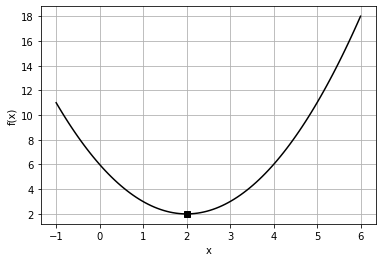

In [7]:
plt.plot(x, y, 'k-')
plt.plot(2, 2, 'sk')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [8]:
grad_f = lambda x: 2 * x - 4

In [9]:
x0 = 0.0

In [10]:
MaxIter = 10

In [11]:
learning_rate = 0.25

In [12]:
print('step\tx \tf(x)')
print('{:02d}\t {:6.5f}\t {:6.5}f'.format(0, x0, f(x0)))
for i in range(MaxIter):
    x1 = x0 - learning_rate * grad_f(x0)
    x0 = x1
    print('{:02d}\t {:6.5f}\t {:6.5}f'.format(i+1, x0, f(x0)))

step	x 	f(x)
00	 0.00000	    6.0f
01	 1.00000	    3.0f
02	 1.50000	   2.25f
03	 1.75000	 2.0625f
04	 1.87500	 2.0156f
05	 1.93750	 2.0039f
06	 1.96875	  2.001f
07	 1.98438	 2.0002f
08	 1.99219	 2.0001f
09	 1.99609	    2.0f
10	 1.99805	    2.0f


In [13]:
import numpy as np
np.random.seed(320)
x_train = np.linspace(-1, 1, 50)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

In [14]:
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * ((w[0] * x_set[i] + w[1]) - y_set[i]) ** 2
    return val / N

In [15]:
def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = (w[0] * x_set[i] + w[1]) - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

In [16]:
idx = np.arange(len(x_train))
print(idx)
np.random.shuffle(idx)
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[32 17 47 33  1  7 23 19 21 40  3 14 18  0  4 12 42 41 25 10  2 36 31  6
 16 24 11 22 45 46 49 15 38 48  8 37 30  9 35 13 28 34 29 27 39 26 20 44
  5 43]


In [17]:
import numpy as np

In [18]:
x_train = np.linspace(-1, 1, 50)

In [19]:
f = lambda x: 0.5 * x + 1.0

In [20]:
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

In [21]:
batch_size = 5
Learning_Rate = 0.1
MaxEpochs = 10
paths = []
batch_loss = []
w0 = np.array([4.0, -1.0])
search_direction = np.zeros_like(w0)

In [22]:
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)

shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

print(shuffled_x_train, '\n',  shuffled_y_train)

[-0.63265306  0.51020408 -1.          0.18367347 -0.71428571 -0.95918367
  0.95918367  0.67346939 -0.3877551  -0.83673469 -0.42857143 -0.55102041
 -0.67346939  0.79591837 -0.10204082  0.02040816  0.06122449  0.87755102
 -0.14285714  0.2244898   0.59183673 -0.06122449 -0.26530612  0.55102041
  0.30612245 -0.02040816  0.3877551  -0.51020408  0.26530612  0.10204082
 -0.18367347  0.75510204  0.91836735 -0.2244898   0.71428571  0.46938776
 -0.34693878 -0.75510204 -0.87755102  0.34693878  0.83673469  0.42857143
  0.63265306 -0.30612245  1.         -0.79591837  0.14285714 -0.59183673
 -0.91836735 -0.46938776] 
 [0.78422473 1.47428628 0.76291903 1.15227214 0.81780495 0.57788914
 1.83408824 1.67631117 1.10908311 0.88376508 1.00206985 0.90733391
 0.87496602 1.79578813 0.98260011 1.10551732 1.31717962 1.80542287
 1.13262642 1.26062683 1.51610096 1.08567054 1.15594681 1.40823498
 1.18517394 1.28846734 1.55140323 0.849739   1.21892853 1.4030643
 1.21892099 1.55941814 1.8382116  0.94143808 1.3662014

In [23]:
Batch.generate_batches(batch_size, shuffled_x_train, shuffled_y_train)

[[array([-0.63265306,  0.51020408, -1.        ,  0.18367347, -0.71428571]),
  array([0.78422473, 1.47428628, 0.76291903, 1.15227214, 0.81780495])],
 [array([-0.95918367,  0.95918367,  0.67346939, -0.3877551 , -0.83673469]),
  array([0.57788914, 1.83408824, 1.67631117, 1.10908311, 0.88376508])],
 [array([-0.42857143, -0.55102041, -0.67346939,  0.79591837, -0.10204082]),
  array([1.00206985, 0.90733391, 0.87496602, 1.79578813, 0.98260011])],
 [array([ 0.02040816,  0.06122449,  0.87755102, -0.14285714,  0.2244898 ]),
  array([1.10551732, 1.31717962, 1.80542287, 1.13262642, 1.26062683])],
 [array([ 0.59183673, -0.06122449, -0.26530612,  0.55102041,  0.30612245]),
  array([1.51610096, 1.08567054, 1.15594681, 1.40823498, 1.18517394])],
 [array([-0.02040816,  0.3877551 , -0.51020408,  0.26530612,  0.10204082]),
  array([1.28846734, 1.55140323, 0.849739  , 1.21892853, 1.4030643 ])],
 [array([-0.18367347,  0.75510204,  0.91836735, -0.2244898 ,  0.71428571]),
  array([1.21892099, 1.55941814, 1.8

In [24]:
for epoch in range(MaxEpochs + 1):
    for x_batch, y_batch in Batch.generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch)
        search_direction = -grad
        Learning_Rate = Learning_Rate
        dw = Learning_Rate * search_direction
        w0 = w0 + dw
    print(epoch, w0, '{:5.4f}'.format(loss(w0, x_train, y_train)))

0 [2.93268455 0.42186099] 1.3144
1 [2.19912794 0.91851884] 0.5320
2 [1.69103304 1.09346429] 0.2478
3 [1.33772146 1.15610018] 0.1220
4 [1.0915585  1.17922051] 0.0624
5 [0.91988154 1.18822393] 0.0337
6 [0.80009379 1.19203732] 0.0198
7 [0.71649161 1.19384329] 0.0130
8 [0.65813704 1.1948075 ] 0.0098
9 [0.61740296 1.1953779 ] 0.0082
10 [0.58896792 1.19574051] 0.0074


In [25]:
from matplotlib.colors import LogNorm

In [26]:
import matplotlib.pyplot as plt

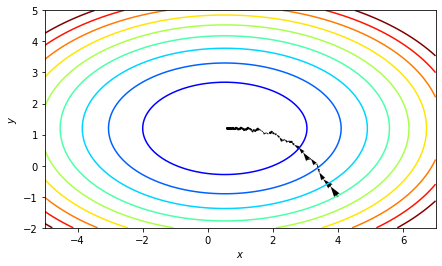

In [27]:
def contour_with_path(l, x, y, paths, norm=LogNorm(), level = np.logspace(0, 5, 35), minima = None):
    paths = np.array(paths).T
    fig, ax = plt.subplots(figsize = (7, 4))
    ax.contour(x, y, l, levels = level, norm = norm, cmap= plt.cm.jet)
    ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:]-paths[0, :-1], paths[1, 1:]-paths[1, :-1], scale_units='xy', angles='xy', scale = 1, color = 'k')
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    plt.show()
W0 = np.linspace(-5, 7, 101)
W1 = np.linspace(-2, 5, 101)
W0, W1 = np.meshgrid(W0, W1)
LOSSW = W0 * 0
for i in range(W0.shape[0]):
    for j in range(W1.shape[1]):
        wij = np.array([W0[i, j], W1[i, j]])
        LOSSW[i, j] = loss(wij, x_train, y_train)
contour_with_path(LOSSW, W0, W1, paths, norm=None, level = np.linspace(0, 10, 10))
        

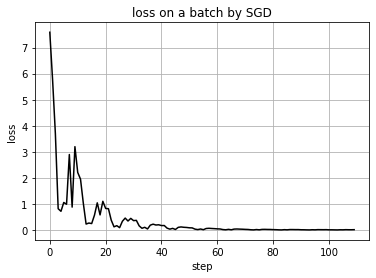

In [28]:
plt.plot(batch_loss, '-k', markerfacecolor='None')
plt.grid()
plt.xlabel('step')
plt.ylabel('loss')
plt.title('loss on a batch by SGD')
plt.show()